## Analytics Pescarte

O Projeto PESCARTE tem como sua principal finalidade a criação de uma rede social regional integrada por pescadores artesanais e por seus familiares, buscando, por meio de processos educativos, promover, fortalecer e aperfeiçoar a sua organização comunitária e a sua qualificação profissional, bem como o seu envolvimento na construção participativa e na implementação de projetos de geração de trabalho e renda.

Por meio do Projeto PESCARTE as comunidades pesqueiras que vivem nos municípios de Arraial do Cabo, Cabo Frio, Macaé, Quissamã, Campos dos Goytacazes, São João da Barra e São Francisco de Itabapoana são mobilizadas, incentivadas e orientadas a participar de diferentes ações e/ou atividades de natureza educativa. São ações e/ou atividades, cuja realização tem como objetivos: aperfeiçoar a atuação profissional dessas comunidades, na perspectiva, seja da ampliação de sua produtividade, seja para poder melhor se organizar e realizar atividades econômicas solidárias.

<img src = "http://www.pea-bc.ibp.org.br/arquivos/projetos/logo_maior/6_logopescarte_228x228.jpg" width = "40%">

Dentro do projeto, foi desenvolvido um **aplicativo de cotação de pescado** por estudantes da UFSCar. Posteriormente, um minicurso sobre a utilização da plataforma foi conduzido em Búzios - RJ. O objetivo do Analytics é obter insights da experiência do usuário em relação ao aplicativo.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Questionário de Avaliação

* 1. Em uma escala de 1 a 5, o quão fácil foi acessar e navegar no aplicativo de cotações Pescarte? (1 = Muito difícil, 5 = Muito fácil)

* 2. Em uma escala de 1 a 5, o quão fácil foi selecionar a fonte de dados na base? (1 = Muito difícil, 5 = Muito fácil)

* 3. Em uma escala de 1 a 5, o quão fácil foi definir o período de consulta? (1 = Muito difícil, 5 = Muito fácil)


* 4. Em uma escala de 1 a 5, o quão fácil foi selecionar os pescados de interesse? (1 = Muito difícil, 5 = Muito fácil)

* 5. Em uma escala de 1 a 5, o quão útil foi a funcionalidade de pesquisa de peixes? (1 = Nada útil, 5 = Muito útil)



* 6. Em uma escala de 1 a 5, o quão fácil foi exportar os dados em formato CSV? (1 = Muito difícil, 5 = Muito fácil) (OBS: Essa pergunta foi descartada durante avaliação)


* 7. Qual é o seu nível geral de satisfação com o aplicativo de cotações Pescarte? (1 = Muito insatisfeito, 5 = Muito satisfeito)

* 8. Você recomendaria o aplicativo de cotações Pescarte para outros pescadores? ( ) Sim ( ) Não


* 9. Quais melhorias você sugeriria para o aplicativo de cotações Pescarte?

* 10. Você encontrou algum problema ou dificuldade ao usar o aplicativo de cotações Pescarte? Se sim, por favor, descreva.


* 11. Você gostaria de compartilhar algum comentário adicional sobre sua experiência com o aplicativo de cotações Pescarte?


### Dados quantitativos

In [27]:
df = pd.read_csv("base.csv", sep = ';')

In [28]:
# Exibir as cinco primeiras entradas
df.head()

,Acessar e Navegar,Selecionar Fonte,Definir Período,Selecionar Pescados,Utilidade,Exportar Dados,Satisfação,Recomendação
0,5,5,5,5,5,5.0,5,Sim
1,3,3,3,3,4,NaN,4,Sim
2,3,3,3,3,4,NaN,5,Sim
3,5,5,4,4,5,NaN,5,Sim
4,5,5,5,5,5,NaN,5,Sim


In [29]:
df.shape

(9, 8)

Obtivemos 9 respostas de pescadoras da região. É possível notar que a coluna `Exportar Dados` possui valores nulos. Isto é porque identificamos que a funcionalidade não iria ser facilmente assimilada pelas usuárias. Irei remover essa coluna da análise.

In [30]:
df.drop(columns = ['Exportar Dados'], axis = 1, inplace = True)

In [31]:
# Exibir informações estatísticas
df.describe()

,Acessar e Navegar,Selecionar Fonte,Definir Período,Selecionar Pescados,Utilidade,Satisfação
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,4.333333,4.444444,4.333333,4.444444,4.666667,4.888889
std,0.866025,0.881917,0.866025,0.881917,0.500000,0.333333
min,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


* No geral, obtivemos respostas entre 3 a 4 (Razoavelmente Fácil e Muito Fácil)

#### Facilidade em Acessar e Navegar

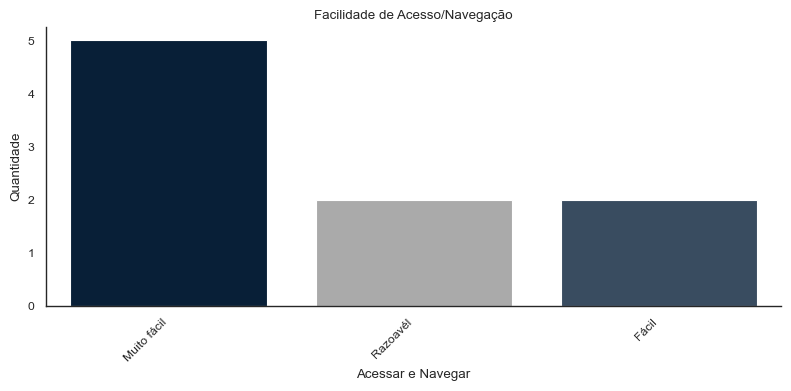

In [32]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))


# Mapeando valores
mapping = {
    1: "Muito difícil",
    2: "Difícil",
    3: "Razoavél",
    4: "Fácil",
    5: "Muito fácil",
}

df['Acessar e Navegar'] = df['Acessar e Navegar'].replace(mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df['Acessar e Navegar'].value_counts()
sns.countplot(x='Acessar e Navegar', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_ylabel('Quantidade')
ax.set_title('Facilidade de Acesso/Navegação')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

In [41]:
df['Acessar e Navegar'].value_counts()

Muito fácil    5
Razoavél       2
Fácil          2
Name: Acessar e Navegar, dtype: int64

Na pesquisa observacional foi observado que algumas mulheres obtiverem dificuldade em acessar o aplicativo, tais como, entender como abrir o navegador e inserir o caminho.
Outras, por outro lado, tiveram facilidade, e uma vez explicado entenderam o processo.
Um insight relevante é pensar em como facilitar ainda mais esse processo, por exemplo, salvando o atalho no celular de forma que com um único clique possa ser acessado. Enviando o link no grupo de whatsapp e afins.

#### Selecionar Fonte

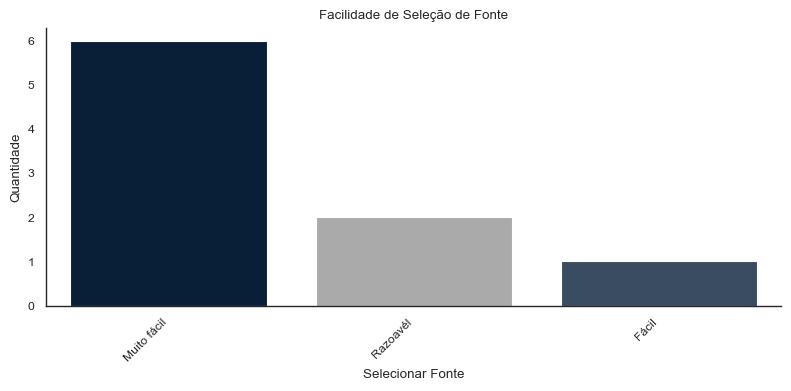

In [43]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))


# Mapeando valores
mapping = {
    1: "Muito difícil",
    2: "Difícil",
    3: "Razoavél",
    4: "Fácil",
    5: "Muito fácil",
}

df['Selecionar Fonte'] = df['Selecionar Fonte'].replace(mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df['Selecionar Fonte'].value_counts()
sns.countplot(x='Selecionar Fonte', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_ylabel('Quantidade')
ax.set_title('Facilidade de Seleção de Fonte')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

In [44]:
df['Selecionar Fonte'].value_counts()

Muito fácil    6
Razoavél       2
Fácil          1
Name: Selecionar Fonte, dtype: int64

De modo geral, foi observado facilidade nessa etapa.

#### Definir período

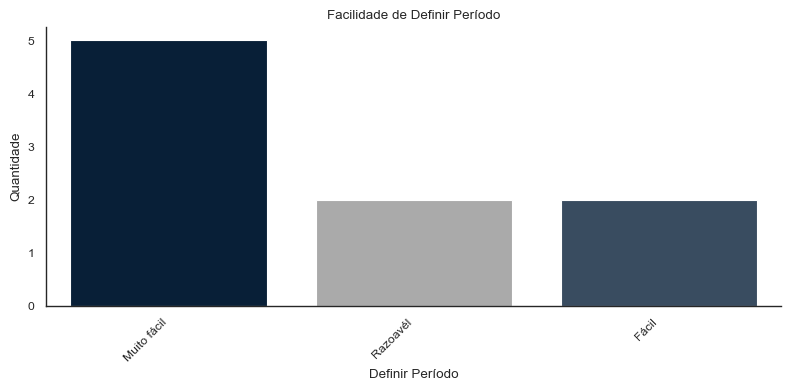

In [34]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))


# Mapeando valores
mapping = {
    1: "Muito difícil",
    2: "Difícil",
    3: "Razoavél",
    4: "Fácil",
    5: "Muito fácil",
}

df['Definir Período'] = df['Definir Período'].replace(mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df['Definir Período'].value_counts()
sns.countplot(x='Definir Período', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_ylabel('Quantidade')
ax.set_title('Facilidade de Definir Período')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

In [45]:
df['Definir Período'].value_counts()

Muito fácil    5
Razoavél       2
Fácil          2
Name: Definir Período, dtype: int64

Observei várias mulheres com dificuldade nessa etapa no celular. Ficou confuso as opções "Período" e "Data", e na opção "Data", várias tiveram dificuldade em clicar nas datas, por os números estarem muito próximo. Também tiveram dificuldade em entender que era necessário clicar em dois dias para obter um range. E ficaram confusas com o pop up de não há data. Há espaço para melhorar bastante aqui.

#### Selecionar Pescados

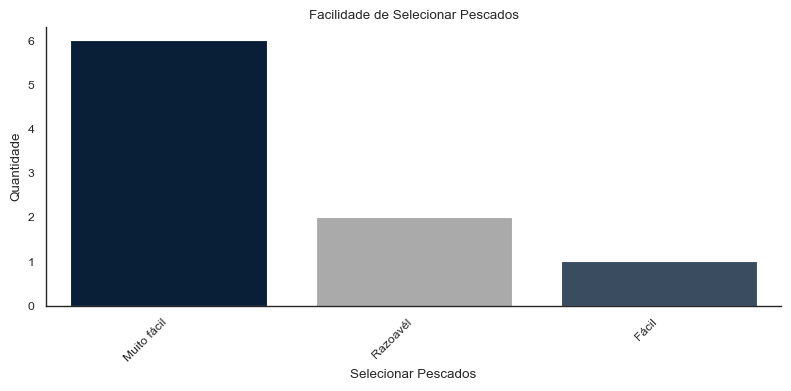

In [35]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))


# Mapeando valores
mapping = {
    1: "Muito difícil",
    2: "Difícil",
    3: "Razoavél",
    4: "Fácil",
    5: "Muito fácil",
}

df['Selecionar Pescados'] = df['Selecionar Pescados'].replace(mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df['Selecionar Pescados'].value_counts()
sns.countplot(x='Selecionar Pescados', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_ylabel('Quantidade')
ax.set_title('Facilidade de Selecionar Pescados')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

In [46]:
df['Selecionar Pescados'].value_counts()

Muito fácil    6
Razoavél       2
Fácil          1
Name: Selecionar Pescados, dtype: int64

Observei algumas mulheres com dificuldade de descer a barra de rolagem para selecionar outros pescados. Algumas conseguiram, outras não.

### Utilidade na funcionalidade pesquisar peixes

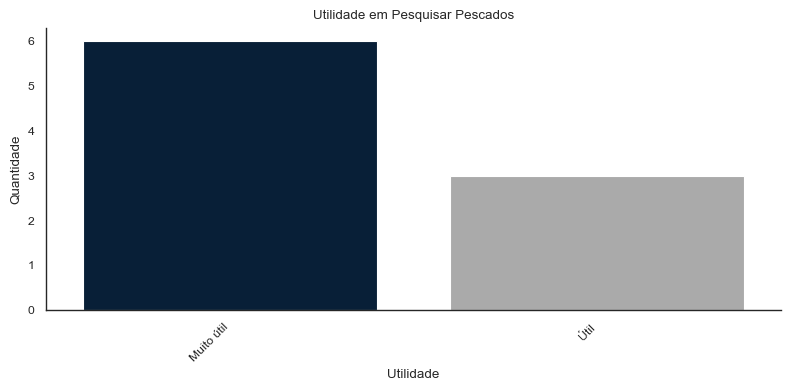

In [36]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))


# Mapeando valores
mapping = {
    1: "Pouco útil",
    3: "Razoavél",
    4: "Útil",
    5: "Muito útil",
}

df['Utilidade'] = df['Utilidade'].replace(mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df['Utilidade'].value_counts()
sns.countplot(x='Utilidade', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_ylabel('Quantidade')
ax.set_title('Utilidade em Pesquisar Pescados')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

In [47]:
df['Utilidade'].value_counts()

Muito útil    6
Útil          3
Name: Utilidade, dtype: int64

Conseguiram entender muito bem quais os peixes apenas pelo nome.

#### Satisfação

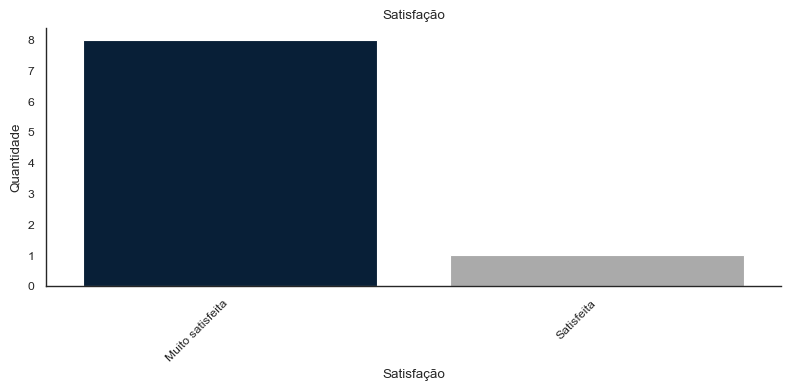

In [38]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))

# Mapeando valores
mapping = {

    4: "Satisfeita",
    5: "Muito satisfeita",
}

df['Satisfação'] = df['Satisfação'].replace(mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df['Satisfação'].value_counts()
sns.countplot(x='Satisfação', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_ylabel('Quantidade')
ax.set_title('Satisfação')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

In [48]:
df['Satisfação'].value_counts()

Muito satisfeita    8
Satisfeita          1
Name: Satisfação, dtype: int64

#### Recomendação

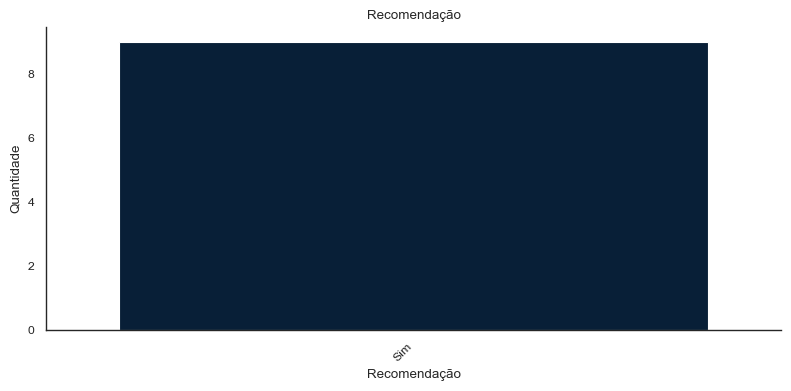

In [39]:
sns.set_style("white")
sns.set_context("paper") 

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#000000"]
sns.set_palette(sns.color_palette(colors))


fig, ax = plt.subplots(figsize=(8, 4))
count = df['Recomendação'].value_counts()
sns.countplot(x='Recomendação', data=df, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_ylabel('Quantidade')
ax.set_title('Recomendação')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

Todas as mulheres afirmaram que recomendariam o aplicativo.

### Dados qualitativos

Obtivemos os seguintes pontos:
* Os preços dos peixes estavam abaixo do habitual, não refletindo a realidade. Isso pode ser porque o valor é de varejo, o que não ficou claro.
* Algumas tiveram dificuldade para clicar em escolher o peixe.
* Vários depoimentos positivos, no geral, gostaram da proposta e pretendem usar.
